In [1]:
# Import important libs.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Read in the data
df = pd.read_csv("/home/yushi/code/churn_broadcasting/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Gather info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# We need to change the TotalCharges to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
# Gather summary statistics about the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


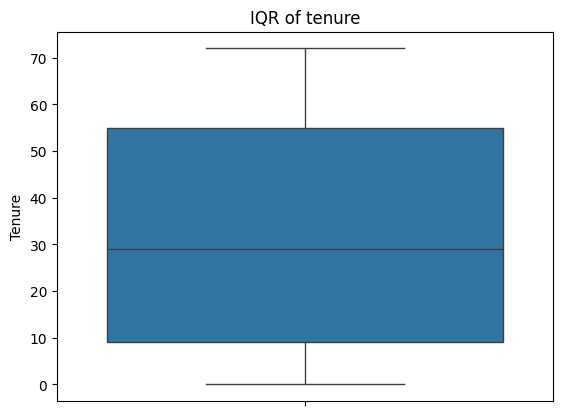

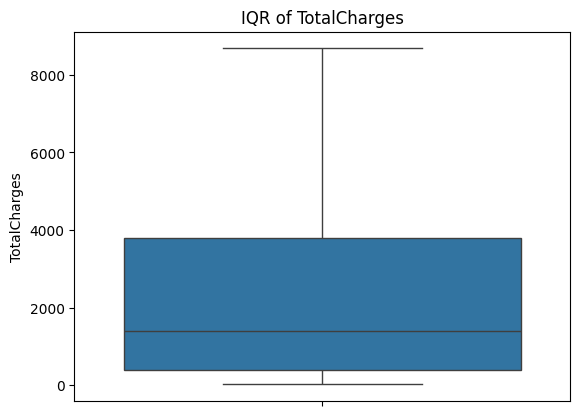

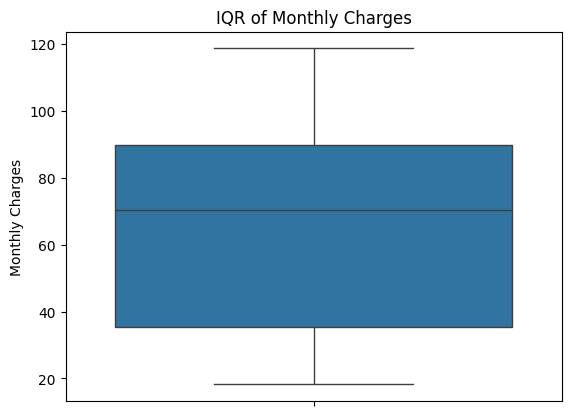

In [7]:
# We need to visualize the IQR of the MonthlyCharges, TotalCharges and tenure columns
sns.boxplot(data=df, y="tenure")
plt.title("IQR of tenure")
plt.ylabel("Tenure")
plt.savefig("../figures/tenure_box_plot.png")

plt.show()


sns.boxplot(data=df, y="TotalCharges")
plt.title("IQR of TotalCharges")
plt.ylabel("TotalCharges")
plt.savefig("../figures/total_charges_box_plot.png")

plt.show()

sns.boxplot(data=df, y="MonthlyCharges")
plt.title("IQR of Monthly Charges")
plt.ylabel("Monthly Charges")
plt.savefig("../figures/monthly_charges_box_plot.png")

plt.show()

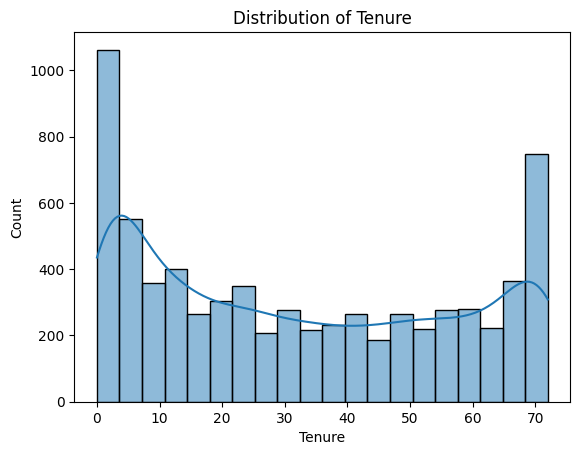

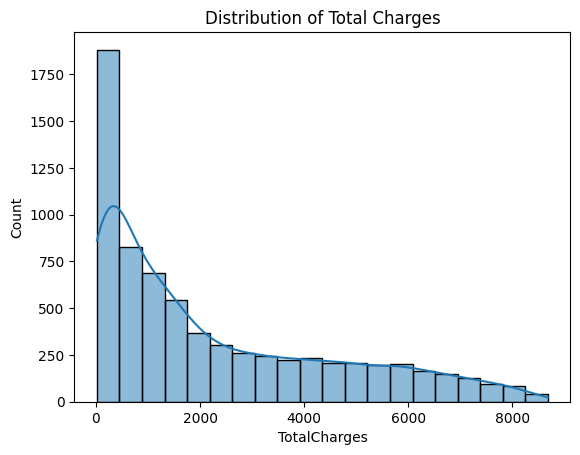

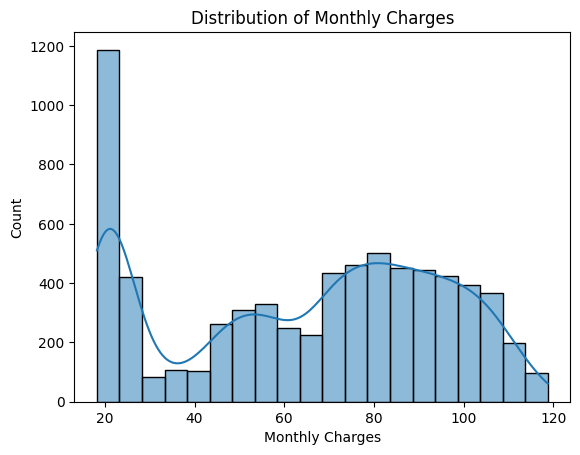

In [8]:
# Plot the distribution of the MonthlyCharges, TotalCharges and tenure columns and compare them to the normal distribution
sns.histplot(df["tenure"], bins=20, kde=True)
plt.xlabel("Tenure")
plt.title("Distribution of Tenure")
plt.savefig("../figures/tenure_histogram.png")

plt.show()

sns.histplot(df["TotalCharges"], bins=20, kde=True)
plt.xlabel("TotalCharges")
plt.title("Distribution of Total Charges")
plt.savefig("../figures/total_charges_histogram.png")

plt.show()

sns.histplot(df['MonthlyCharges'], bins=20, kde=True)
plt.xlabel("Monthly Charges")
plt.title("Distribution of Monthly Charges")
plt.savefig("../figures/monthly_charges_histogram.png")

plt.show()

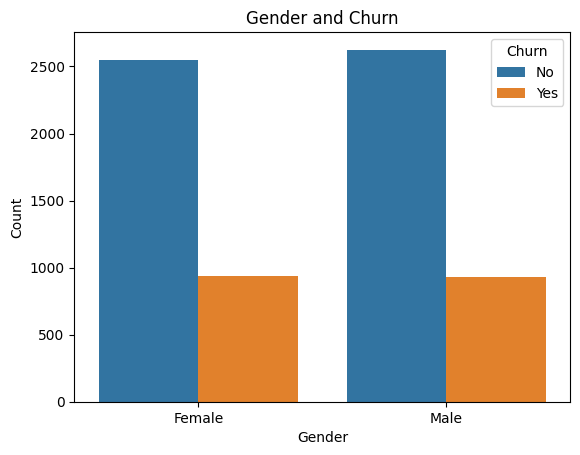

In [9]:
# Now that we know that that data is not normal and the TotalCharges is left-skeweed
# Now we need to plot the relation between the gender and churn
sns.countplot(data=df, x="gender", hue="Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender and Churn")
plt.savefig("../figures/gender_churn.png")
plt.show()

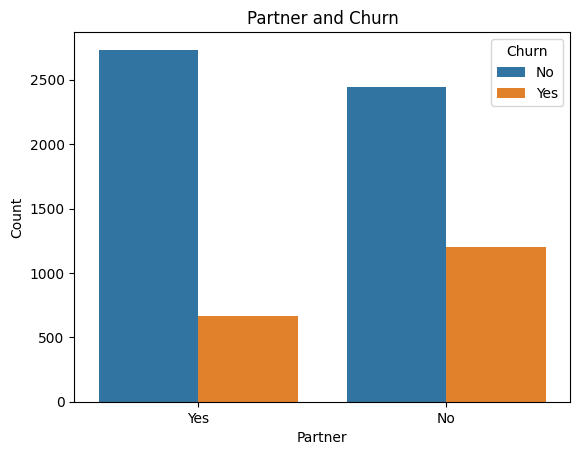

In [10]:
# Now we find out that there is very low corelation between the gender and churn
# Now we find out is there a corelation between partner and churn
sns.countplot(data=df, x="Partner", hue="Churn")
plt.xlabel("Partner")
plt.ylabel("Count")
plt.title("Partner and Churn")
plt.savefig("../figures/partner_churn.png")
plt.show()

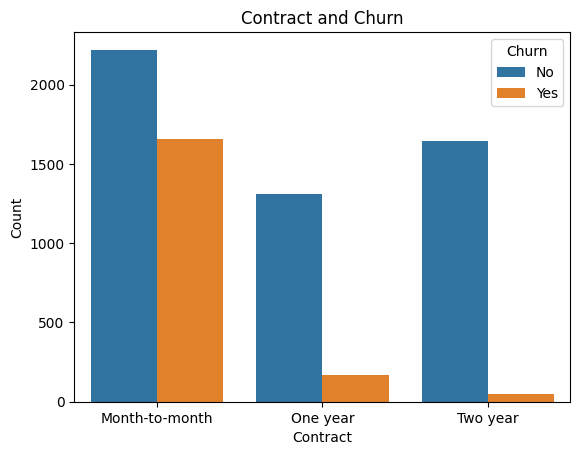

In [11]:
# So there is some relationship between the if the customer has a partner or not and the churn, so if you have don't have a partner you are more likely to churn
# Now we need to check if the Contract type is related to the churn
sns.countplot(data=df, x="Contract", hue="Churn")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.title("Contract and Churn")
plt.savefig("../figures/contract_churn.png")
plt.show()

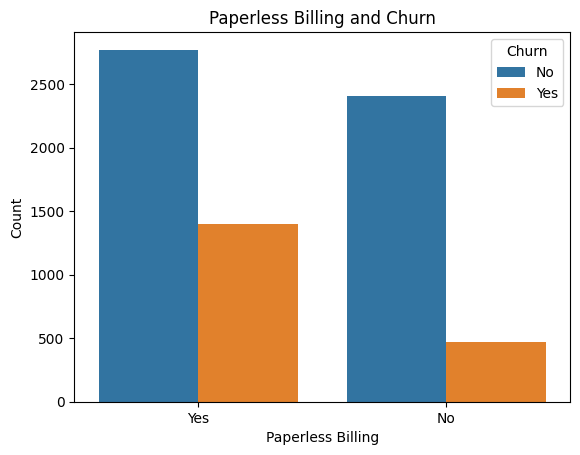

In [12]:
# So we found out that it's related pretty much.
# let's see the relation between the PaperlessBilling and churn.
sns.countplot(data=df, x="PaperlessBilling", hue="Churn")
plt.xlabel("Paperless Billing")
plt.ylabel("Count")
plt.title("Paperless Billing and Churn")
plt.savefig("../figures/billing_churn.png")
plt.show()

In [13]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
services_and_churn = ["PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Churn"]

df[services_and_churn]

,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,No,No,Yes,No,No,No,No,No
1,Yes,Yes,No,Yes,No,No,No,No
2,Yes,Yes,Yes,No,No,No,No,Yes
3,No,Yes,No,Yes,Yes,No,No,No
4,Yes,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...
7038,Yes,Yes,No,Yes,Yes,Yes,Yes,No
7039,Yes,No,Yes,Yes,No,Yes,Yes,No
7040,No,Yes,No,No,No,No,No,No
7041,Yes,No,No,No,No,No,No,Yes


In [15]:
services_and_churn = ["PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Churn"]

for col in services_and_churn:
    print(col)
    print(df[col].unique())

PhoneService
['No' 'Yes']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Churn
['No' 'Yes']


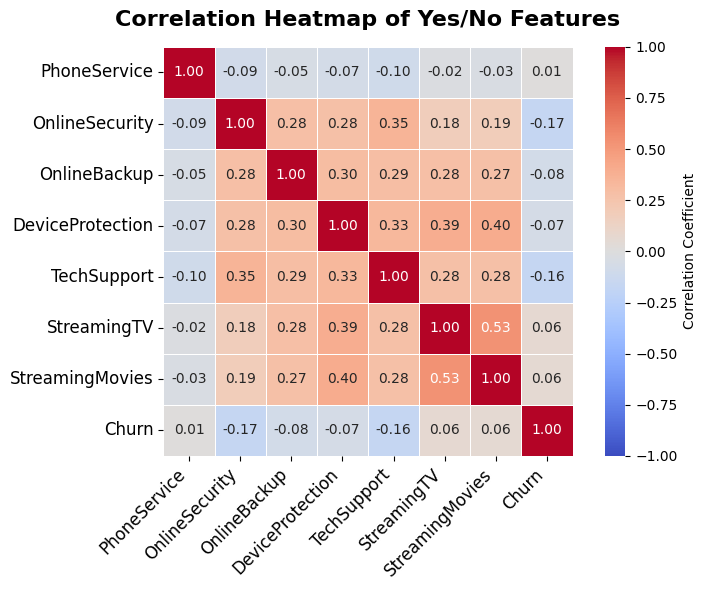

In [16]:
# So paperless billings leads to more churn.
# We need to find the corelation between each service in the bill and the churn.
services_and_churn = ["PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Churn"]

# first we make those columns int64 with the values 0 and 1.
for col in services_and_churn:
    df[col] = df[col].map({"Yes": True, "No": False, "No internet service": False})

df[services_and_churn] = df[services_and_churn].astype(int)

# then we compute the corelation matrix
corr_matrix = df[services_and_churn].corr()

# Now we do a heatmap plot of the relationships.
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"label": "Correlation Coefficient"}
)

plt.title("Correlation Heatmap of Yes/No Features", fontsize=16, weight="bold", pad=15)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right spines
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("../figures/service_to_churn_correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

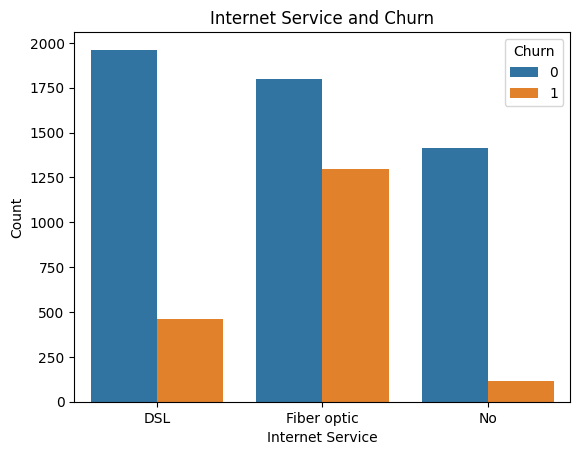

In [17]:
# So we can find out that those services don't make a significant contribution to the user decision.
# we need to invistigate about the internet service
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.title("Internet Service and Churn")
plt.savefig("../figures/internet_service_churn.png")
plt.show()

In [18]:
# So we know that the internet service will affect the choice
# Now we need to know only the relation between the seniorcitizen and dependents so I can finish EDA.
print(df['SeniorCitizen'].unique())
print(df['Dependents'].unique())

[0 1]
['No' 'Yes']


In [19]:
df['Dependents'] = df['Dependents'].map({"No": False, "Yes": True}).astype(int)
print(df['Dependents'].unique())

[0 1]


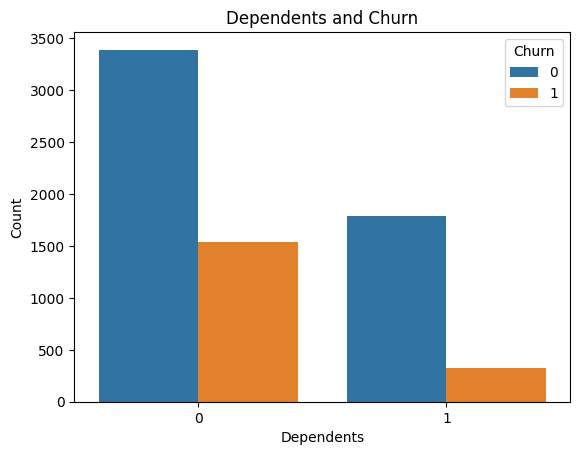

In [20]:
sns.countplot(data=df, x="Dependents", hue="Churn")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.title("Dependents and Churn")
plt.savefig("../figures/dependents_churn.png")
plt.show()

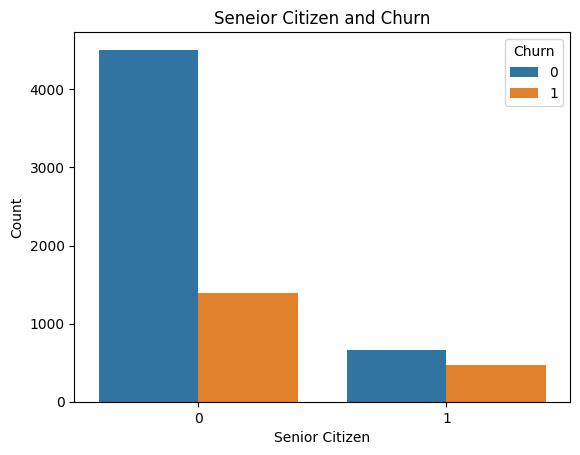

In [21]:
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.title("Seneior Citizen and Churn")
plt.savefig("../figures/senior_citizen_churn.png")
plt.show()

In [22]:
# So after EDA we can see that the most important features are:

# 1. SeniorCitizen
# 2. Dependents
# 3. InternetService
# 4. Contract
# 5. PaperlessBilling
# 6. partner
# 7. tenure
# 8. MonthlyCharges
# 9. TotalCharges

# Now we can remove the remained features
features = ['SeniorCitizen', 'Dependents', 'InternetService', 'Contract', 'PaperlessBilling', 'Partner', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

df = df[features]

df

,SeniorCitizen,Dependents,InternetService,Contract,PaperlessBilling,Partner,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,DSL,Month-to-month,Yes,Yes,1,29.85,29.85,0
1,0,0,DSL,One year,No,No,34,56.95,1889.50,0
2,0,0,DSL,Month-to-month,Yes,No,2,53.85,108.15,1
3,0,0,DSL,One year,No,No,45,42.30,1840.75,0
4,0,0,Fiber optic,Month-to-month,Yes,No,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,1,DSL,One year,Yes,Yes,24,84.80,1990.50,0
7039,0,1,Fiber optic,One year,Yes,Yes,72,103.20,7362.90,0
7040,0,1,DSL,Month-to-month,Yes,Yes,11,29.60,346.45,0
7041,1,0,Fiber optic,Month-to-month,Yes,Yes,4,74.40,306.60,1


In [23]:
# We can do some preprocessing here as we make the partner and paperless billing into int
df['Partner'] = df['Partner'].map({"Yes": True, "No": False}).astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].map({"Yes": True, "No": False}).astype(int)

/tmp/ipykernel_144873/2464796518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Partner'] = df['Partner'].map({"Yes": True, "No": False}).astype(int)
/tmp/ipykernel_144873/2464796518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PaperlessBilling'] = df['PaperlessBilling'].map({"Yes": True, "No": False}).astype(int)


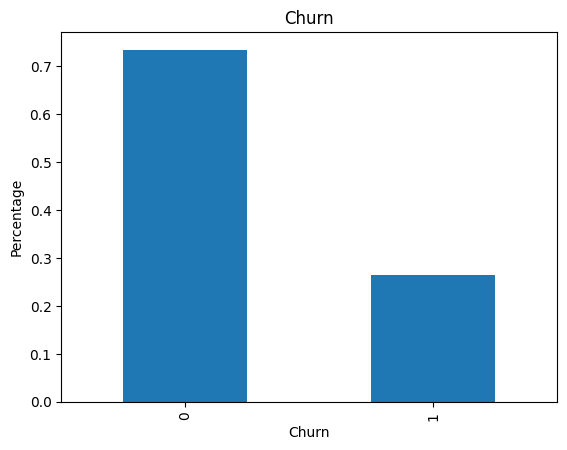

In [26]:
df['Churn'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Churn")
plt.ylabel("Percentage")
plt.title("Churn")
plt.savefig("../figures/churn_percentage.png")
plt.show()

In [24]:
df

,SeniorCitizen,Dependents,InternetService,Contract,PaperlessBilling,Partner,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,DSL,Month-to-month,1,1,1,29.85,29.85,0
1,0,0,DSL,One year,0,0,34,56.95,1889.50,0
2,0,0,DSL,Month-to-month,1,0,2,53.85,108.15,1
3,0,0,DSL,One year,0,0,45,42.30,1840.75,0
4,0,0,Fiber optic,Month-to-month,1,0,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,1,DSL,One year,1,1,24,84.80,1990.50,0
7039,0,1,Fiber optic,One year,1,1,72,103.20,7362.90,0
7040,0,1,DSL,Month-to-month,1,1,11,29.60,346.45,0
7041,1,0,Fiber optic,Month-to-month,1,1,4,74.40,306.60,1


In [ ]:
df.to_csv('../data/preprocessed/after_eda_data.csv', index=False)